# Workshop Web Scraping (Semana 7)

**Exercícios**

Nessa primeira parte vamos carregar no BeutifulSoup a página: https://www.worldatlas.com/articles/the-25-largest-internet-companies-in-the-world.html
e:


1.   pegar todas as linhas da única tabela da página
2.   colocar em 2 listas, as empresas (Company) e o faturamento (Revenue ($B))



In [3]:
import requests
from bs4 import BeautifulSoup

URL = "https://www.worldatlas.com/articles/the-25-largest-internet-companies-in-the-world.html"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

table = soup.table # retorna primeira table da página
# table = soup.find('table') # outra forma de 'pegar' a tag table (quando tem apenas 1 table na página, usando .find)

tbody = table.tbody

rows = tbody.findAll('tr')

companies = [] # lista vazia para colocar as empresas
revenues = [] # lista vazia para colocar o faturamento das empresas

for row in rows:
    companies.append(row.findAll('td')[1].text)
    revenues.append(float(row.findAll('td')[3].text.strip('$')))

print(companies)
print(revenues)

['Amazon', 'Google', 'Facebook', 'Tencent', 'Alibaba', 'Baidu', 'Priceline Group', 'eBay', 'Netflix', 'Expedia,Inc.', 'Rakuten', 'Salesforce.com', 'Yahoo', 'ODIGEO', 'NetEase', 'Zalando', 'Groupon', 'LinkedIn', 'Twitter', 'Naver Corporation', 'Cimpress', 'TripAdvisor', 'flipkart', 'ASOS.com', 'Yandex']
[107.0, 74.98, 17.93, 15.84, 12.29, 10.56, 9.22, 8.59, 6.77, 6.67, 6.3, 5.37, 4.97, 4.9, 3.63, 3.28, 3.1, 2.99, 2.22, 2.2, 1.78, 1.5, 1.5, 1.4, 0.9]


Na segunda parte, criar um gráfico de barras com os dados de empresas e faturamento de cada empresa

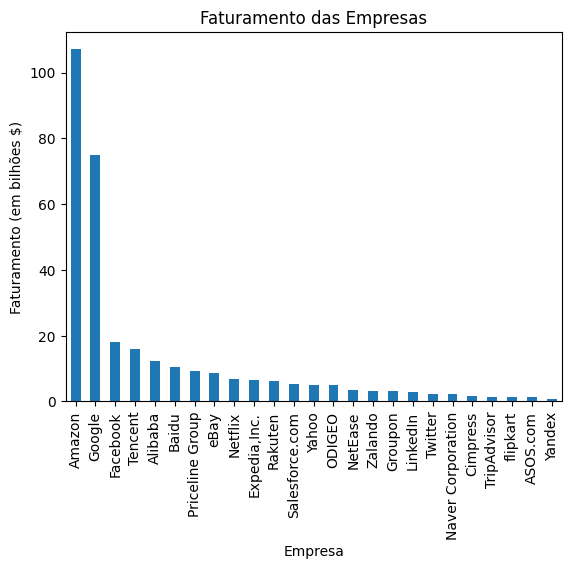

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar um DataFrame do Pandas com os dados
data = {'Empresa': companies, 'Faturamento': revenues}
df = pd.DataFrame(data)

# Plotar o gráfico de barras
df.plot(x='Empresa', y='Faturamento', kind='bar', legend=False)
plt.xlabel('Empresa')
plt.ylabel('Faturamento (em bilhões $)')
plt.title('Faturamento das Empresas')
plt.show()